## Import libs

In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import PolynomialFeatures, SplineTransformer, FunctionTransformer, PowerTransformer, QuantileTransformer
from sklearn.linear_model import LinearRegression, SGDRegressor

from sklearn.pipeline import make_pipeline
import os

## Feature Transform (SplineTransform)

##### Load Data

In [10]:

notebook_path = os.getcwd()
# Datasets path
# auto
csv_data_path = f"{notebook_path}/data/data_spline.csv"

In [11]:
spline_data = pd.read_csv(csv_data_path)
spline_data.head()
x = spline_data['x_spline']
y = spline_data['y_spline']

#### Plot Data

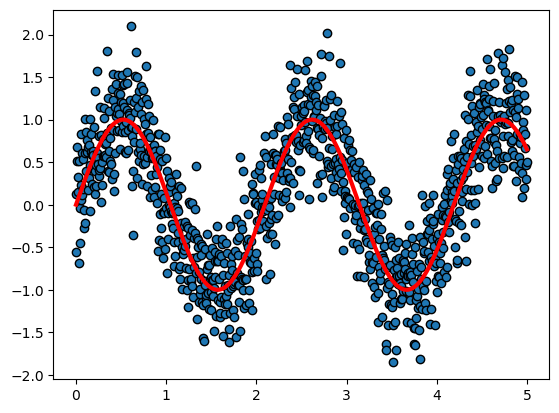

In [12]:
plt.scatter(x, y, ec='k')
plt.plot(x, np.sin(3*x), color='r', lw=3);

#### Spline VS Polynomial

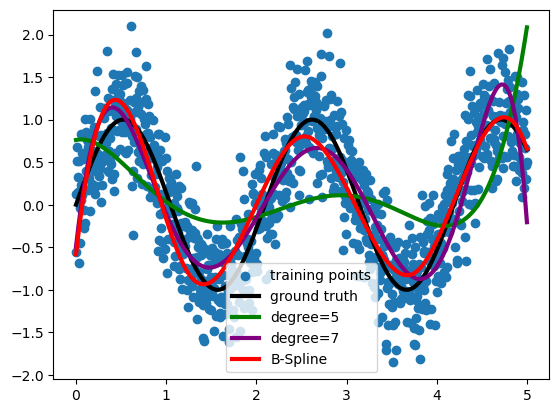

In [13]:
# polynomial with degree=5
poly = PolynomialFeatures(degree=5)
x_poly_degree5 = poly.fit_transform(x.values[:, None])
model_with_degree5 = LinearRegression()
model_with_degree5.fit(x_poly_degree5, y)
y_hat_degree5 = model_with_degree5.predict(x_poly_degree5)

# polynomial with degree=7
poly = PolynomialFeatures(degree=7)
x_poly_degree7 = poly.fit_transform(x.values[:, None])
model_with_degree7 = LinearRegression()
model_with_degree7.fit(x_poly_degree7, y)
y_hat_degree7 = model_with_degree7.predict(x_poly_degree7)

# spline with degree=3 and knot=5
spline = SplineTransformer()
x_spline = spline.fit_transform(x.values[:, None])
model_spline = LinearRegression()
model_spline.fit(x_spline, y)
y_hat_spline = model_spline.predict(x_spline)


plt.scatter(x, y, label='training points')
plt.plot(x, np.sin(3*x), color='k', lw=3, label='ground truth');
plt.plot(x, y_hat_degree5, color='g', lw=3, label='degree=5');
plt.plot(x, y_hat_degree7, color='purple', lw=3, label='degree=7');
plt.plot(x, y_hat_spline, color='r', lw=3, label='B-Spline');
plt.legend();

#### Spline with degree={1, 3, 10}

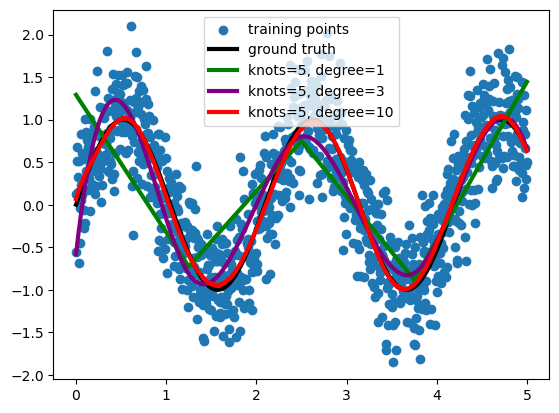

In [14]:
# spline with knots=5, degree=1
spline = SplineTransformer(n_knots=5, degree=1)
x_spline_degree1 = spline.fit_transform(x.values[:, None])
model_spline_degree1 = LinearRegression()
model_spline_degree1.fit(x_spline_degree1, y)
y_hat_spline_degree1 = model_spline_degree1.predict(x_spline_degree1)

# spline with knots=5, degree=3
spline = SplineTransformer(n_knots=5, degree=3)
x_spline_degree3 = spline.fit_transform(x.values[:, None])
model_spline_degree3 = LinearRegression()
model_spline_degree3.fit(x_spline_degree3, y)
y_hat_spline_degree3 = model_spline_degree3.predict(x_spline_degree3)

# spline with knots=5, degree=10
spline = SplineTransformer(n_knots=5, degree=10)
x_spline_degree5 = spline.fit_transform(x.values[:, None])
model_spline_degree5 = LinearRegression()
model_spline_degree5.fit(x_spline_degree5, y)
y_hat_spline_degree5 = model_spline_degree5.predict(x_spline_degree5)


plt.scatter(x, y, label='training points')
plt.plot(x, np.sin(3*x), color='k', lw=3, label='ground truth');
plt.plot(x, y_hat_spline_degree1, color='g', lw=3, label='knots=5, degree=1');
plt.plot(x, y_hat_spline_degree3, color='purple', lw=3, label='knots=5, degree=3');
plt.plot(x, y_hat_spline_degree5, color='r', lw=3, label='knots=5, degree=10');
plt.legend();

#### Spline with knot={5, 10, 15}

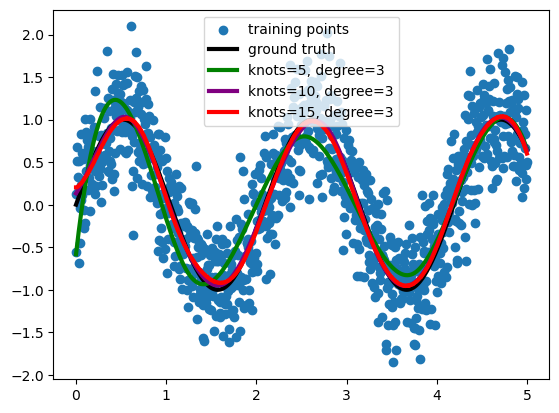

In [15]:
# spline with knots=5, degree=3
spline = SplineTransformer(n_knots=5, degree=3)
x_spline_knot5 = spline.fit_transform(x.values[:, None])
model_spline_knot5 = LinearRegression()
model_spline_knot5.fit(x_spline_knot5, y)
y_hat_spline_knot5 = model_spline_knot5.predict(x_spline_knot5)

# spline with knots=10, degree=3
spline = SplineTransformer(n_knots=10, degree=3)
x_spline_knot10 = spline.fit_transform(x.values[:, None])
model_spline_knot10 = LinearRegression()
model_spline_knot10.fit(x_spline_knot10, y)
y_hat_spline_knot10 = model_spline_knot10.predict(x_spline_knot10)

# spline with knots=15, degree=3
spline = SplineTransformer(n_knots=15, degree=3)
x_spline_knot15 = spline.fit_transform(x.values[:, None])
model_spline_knot15 = LinearRegression()
model_spline_knot15.fit(x_spline_knot15, y)
y_hat_spline_knot15 = model_spline_knot15.predict(x_spline_knot15)


plt.scatter(x, y, label='training points')
plt.plot(x, np.sin(3*x), color='k', lw=3, label='ground truth');
plt.plot(x, y_hat_spline_knot5, color='g', lw=3, label='knots=5, degree=3');
plt.plot(x, y_hat_spline_knot10, color='purple', lw=3, label='knots=10, degree=3');
plt.plot(x, y_hat_spline_knot15, color='r', lw=3, label='knots=15, degree=3');
plt.legend();